# Introduction to PageRank

## Background
We live in a XXI century and information is a cornerstone of majority of spheres in our daily life. When we want to find useful information, we just go to our favorite Internet search engine and type a key words. Than, search engine provides us with some kind of relevent information. But how to ensure relevancy of this information?

The naive approach is following: we just measure frequency of key word in each page in the Network. The more appearing frequency of key word we have, the higher position this site will gain. Definetely, this approach has obvious disadvantages, but there was the situation in text search in early 90s.

## PageRank

Here we can see simple example. Imagine, that we have 4 websites with some links. Our goal is to understand some kind of **importance** of each website. Obviously, we can reformulate such problum in terms of directed graphs. Here, each node is website and each directed vertice describes link from one site to another.

![](PR1.svg)

In PageRank model each node should transfer their importance through their outcoming vertices. Suppose, each website has total importance equal to $1$

![](PR2.svg)

Thus, we can introduce transition matrix $A$:

$$
A = \begin{pmatrix}
0 & \frac{1}{2} & 1 & \frac{1}{3} \\
1 & 0 & 0 & \frac{1}{3} \\
0 & 0 & 0 & \frac{1}{3} \\
0 & \frac{1}{2} & 0 & 0
\end{pmatrix}
$$

Let us introduce **PageRank vector** $\mathbf{x}$, which describes importance of each website. 

$$\mathbf{x} = (x_1, x_2, x_3, x_4)^\text{T},\text{ where $x_i$ - importance of $i$-th website}$$

Suppose, initial importance is uniformly distributed between all nodes. Than: 

$$\mathbf{x}^0 = (0.25, 0.25, 0.25, 0.25)^\text{T}$$

Each incoming link increase importance of each node. So, this update can be expressed as a matrix multiplication:

$$\mathbf{x}^1 = A \cdot \mathbf{x}^0 = (0.46, 0.33, 0.08, 0.125)^\text{T}$$

Repeating the same operations we can easily see convergence:

$$\mathbf{x}^2 = A \cdot \mathbf{x}^1 = (0.29, 0.50, 0.04, 0.17)^\text{T}$$

$$\mathbf{x}^3 = A \cdot \mathbf{x}^2 = (0.35, 0.35, 0.06, 0.25)^\text{T}$$

$$\mathbf{x}^4 = A \cdot \mathbf{x}^3 = (0.31, 0.43, 0.08, 0.17)^\text{T}$$

$$\mathbf{x}^5 = A \cdot \mathbf{x}^4 = (0.36, 0.37, 0.06, 0.22)^\text{T}$$

$$\dots$$

$$\mathbf{x}^{14} = A \cdot \mathbf{x}^{13} = (0.33, 0.40, 0.07, 0.20)^\text{T}$$

$$\mathbf{x}^{15} = A \cdot \mathbf{x}^{14} = (0.33, 0.40, 0.07, 0.20)^\text{T}$$

The code below could be used for playing with this simple example.

In [2]:
import numpy as np

# Initializing:
x_0 = np.array([0.25, 0.25, 0.25, 0.25])

# Input matrix A:
A = np.array([[0, 0.5, 1, 1/3], 
              [1, 0, 0, 1/3], 
              [0, 0, 0, 1/3], 
              [0, 0.5, 0, 0]])

# PageRank iterations:
# k - number of steps to obtain convergence:
k = 20
x_new = x_0
for i in range(k):
    x_old = x_new
    x_new = np.dot(A, x_old)
    print (i+1, x_new)

1 [0.45833333 0.33333333 0.08333333 0.125     ]
2 [0.29166667 0.5        0.04166667 0.16666667]
3 [0.34722222 0.34722222 0.05555556 0.25      ]
4 [0.3125     0.43055556 0.08333333 0.17361111]
5 [0.35648148 0.37037037 0.05787037 0.21527778]
6 [0.31481481 0.42824074 0.07175926 0.18518519]
7 [0.34760802 0.37654321 0.0617284  0.21412037]
8 [0.32137346 0.41898148 0.07137346 0.1882716 ]
9 [0.3436214  0.38413066 0.0627572  0.20949074]
10 [0.32465278 0.41345165 0.06983025 0.19206533]
11 [0.34057785 0.38867455 0.06402178 0.20672582]
12 [0.32726766 0.40948645 0.06890861 0.19433728]
13 [0.33843093 0.39204675 0.06477909 0.20474323]
14 [0.32905021 0.40667867 0.06824774 0.19602338]
15 [0.3369282  0.39439134 0.06534113 0.20333933]
16 [0.33031657 0.40470798 0.06777978 0.19719567]
17 [0.33586566 0.39604846 0.06573189 0.20235399]
18 [0.33120745 0.40331699 0.06745133 0.19802423]
19 [0.3351179  0.39721553 0.06600808 0.20165849]
20 [0.33183534 0.4023374  0.0672195  0.19860776]


## Mathematical formulation
Consider a directed graph $G$, our problem is to find such $\mathbf{x}^{*}$, that: 

$$A \cdot \mathbf{x}^{*} =\mathbf{x}^{*} \;\;\;\;\;\;\;\;\;\;\; (1)$$

Where $A$ is a matrix, which describes graph: $A_{i,j} \ge 0 , \forall i,j$ and $ \sum\limits_{i = 1}^{n} A_{i,j} = 1$ (A is *column-stochastic* matrix)

It is important to mention, that $A$ is usually *sparse*.

## Linear Algebra

Finding importance of webpages is equivalent to solving system of equations:

$$\begin{pmatrix}
0 & \dfrac{1}{2} & 1 & \dfrac{1}{3} \\
1 & 0 & 0 & \dfrac{1}{3} \\
0 & 0 & 0 & \dfrac{1}{3} \\
0 & \dfrac{1}{2} & 0 & 0
\end{pmatrix} \cdot \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix} = \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix}$$

Or, to find eigenvector of matrix $A$, corresponding to unit eigenvalue.

Also, there is a linear system formulation! Firstly, we should find such $\hat{x}$:

$$ \left( A - I\right) \cdot \begin{bmatrix}
\hat{x} \\
1
\end{bmatrix} = 0$$

Then, we could take $\mathbf{x}^{*}$ as a solution:

$$\mathbf{x}^{*} = \dfrac{\begin{bmatrix}
\hat{x} \\
1
\end{bmatrix}}{\left\| \begin{bmatrix}
\hat{x} \\
1
\end{bmatrix}\right\|_1}$$

## Probability

Since the importance of a web page is measured by its popularity (how many incoming links it has), we can view the importance of page $i$ as the probability that a random surfer on the Internet that opens a browser to any page and starts following hyperlinks, visits the page $i$. We can interpret the weights we assigned to the edges of the graph in a probabilistic way: A random surfer that is currently viewing web page $2$, has $\frac{1}{2}$ probability to go to page 1, and $\frac{1}{2}$ probability to go to page 4. We can model the process as a random walk on graphs. Each page has equal probability $\frac{1}{4}$ to be chosen as a starting point. So, the initial probability distribution is given by the column vector $(\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4})^\text{T}$. 

The probability that page $i$ will be visited after one step is equal to $A \cdot \mathbf{x}$, and so on. The probability that page $i$ will be visited after $k$ steps is equal to $A^k \cdot \mathbf{x}$. The sequence $A \cdot \mathbf{x}, A^2 \cdot \mathbf{x}, A^3 \cdot \mathbf{x}, ..., A^k \cdot \mathbf{x}, \dots$ converges in this case to a unique probabilistic vector $\mathbf{x}^*$. In this context $\mathbf{x}^*$ is called the **stationary distribution** and it will be our Page Rank vector. Moreover, the $i$-th entry in the vector $\mathbf{x}^*$ is simply the probability that at each moment a random surfer visits page $i$. The computations are identical to the ones we did in the dynamical systems interpretation, only the meaning we attribute to each step being slightly different.

## Optimization
We can solve problem (1) as an optimization problem: finding closest solution, which satisfy some criteria:

$$\mathbf{x}^{*} = \underset{\mathbf{x} \in S^n}{\operatorname{argmin}} \lVert A\mathbf{x} - \mathbf{x} \rVert_2 = \underset{\mathbf{x} \in S^n}{\operatorname{argmin}} \lVert A\mathbf{x} - \mathbf{x} \rVert_2^2$$

Where $S^n$ - is a unit simplex ($S^n = \{x: \sum\limits_{i = 1}^n x_i = 1, x_i \ge 0 \}$)

#### Problems :(

* Dangling nodes
* Disconnected components

##### Perron-Frobenius Theorem

If $A$ is a positive, column stochastic matrix, then:

1) $1$ is an eigenvalue of multiplicity one.

2) $1$ is the largest eigenvalue: all the other eigenvalues have absolute value smaller than $1$.

3) The eigenvectors corresponding to the eigenvalue $1$ have either only positive entries or only negative entries. In particular, for the eigenvalue $1$ there exists a unique eigenvector with the sum of its entries equal to $1$.

# Implementation

#### Loading matrix A

In [5]:
# https://github.com/MerkulovDaniil/mda24/blob/main/files/simple_wiki_matrix.mat
# https://github.com/MerkulovDaniil/mda24/blob/main/files/simple_wiki_dict.pickle

import requests
import pickle
# Define the URLs of the files to download
url1 = "https://raw.githubusercontent.com/MerkulovDaniil/mda24/main/files/simple_wiki_matrix.mat"
url2 = "https://raw.githubusercontent.com/MerkulovDaniil/mda24/main/files/simple_wiki_dict.pickle"
# Download the files
response1 = requests.get(url1)
response2 = requests.get(url2)
# Save the files to local files
with open("simple_wiki_matrix.mat", "wb") as f:
    f.write(response1.content)
with open("simple_wiki_dict.pickle", "wb") as f:
    f.write(response2.content)
print("Files downloaded successfully!")

Files downloaded successfully!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from sklearn.preprocessing import normalize


# Loading web-graph matrix

matrix = scipy.io.loadmat('simple_wiki_matrix.mat')
A_raw = matrix['W']


# Getting data to input format of PageRank model (Normalization)

A_normalized = normalize(A_raw, norm='l1', axis=0)
N = A_normalized.shape[0]


# Check, that our matrix is column-stochastic

def column_stochastic_check(matrix):
    
    dimension = matrix.shape[0]
    first = 1
    eps = 0.0001 # Accuracy of normalization. 0 = ideal normalization (unlikely situation)
    
    for i in range(dimension):
        mini = matrix.getcol(i).min()
        if mini < 0:
            first = 0
    
    second = 1
    for i in range(dimension):
        col = matrix.getcol(i).sum()
        if (1-eps > col) or (1+eps < col):
            second = 0
    
    return bool(first*second)


print ('Size of the PageRank matrix: ', N)
print ('Checking if our matrix is column-stochastic... It might several minutes')
#print (column_stochastic_check(A_normalized))
print ('Required memory: Sparse format (' + str(round(A_normalized.data.nbytes/1024/1024,2)) + ' MB), Usual format (' + str(round(N*N*24/1024/1024,2)) + ' MB). Compression rate: ' + str(round(N*N*24/A_normalized.data.nbytes,2)))


FileNotFoundError: [Errno 2] No such file or directory: 'https://github.com/MerkulovDaniil/mda24/blob/main/files/simple_wiki_matrix.mat'

#### Power Method

Using Power Method we obtained maximum eigenvalue:  0.899808264658


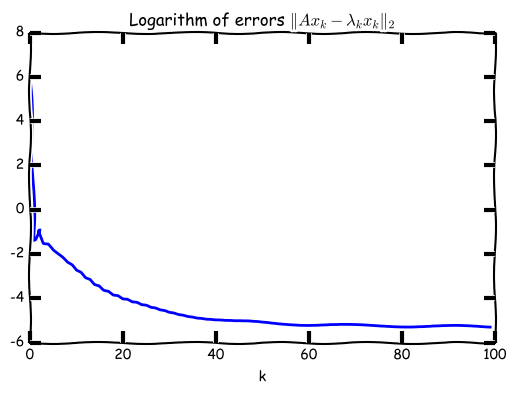

In [6]:
#############################################################################
def power_method(A, p, x0, k):
    
    N = len(x0)   
    x_prev = np.array(x0)
    errors = []
    
    for i in range(k):
        x_k = x_prev
        lambda_k = 
        errors.append(np.linalg.norm(Ax_k - lambda_k * x_k))
    
    return lambda_k, x_prev, errors
##############################################################################
lambda_, x, errors = power_method(A_normalized, 0.9, np.ones(N), 100) # lambda_ - maximum eigenvalue, x - PageRank vector, errors - residiual on k-th step
print ("Using Power Method we obtained maximum eigenvalue: ", lambda_)

plt.plot(np.log(errors))
plt.title("Logarithm of errors $\|Ax_k - \lambda_k x_k\|_2$")
plt.xlabel("k")
plt.show()

In [7]:
# Finding correspondence between number of article in matrix A and actual name of article.
import pickle

articles_ = []
with open('https://github.com/MerkulovDaniil/mda24/blob/main/files/simple_wiki_dict.pickle', 'rb') as f:
    while True:
        try:
            temp = pickle._Unpickler(f)       #
            temp.encoding = 'latin1'          # Some encoding magic suitable for Python 3
            articles_.append(temp.load())     #
        except EOFError:
            break

articles = articles_[0]

In [9]:
# Top most important articles in English Wikipedia:
n_top = 10
top = x.argsort()[-n_top:][::-1]

print ("Top " + str(n_top) + " articles in English segment of Wikipedia:\n")
for index in top:
    print (articles[index])

Top 10 articles in English segment of Wikipedia:

United_States
Multimedia
Geographic_coordinate_system
France
Americans
Internet_Movie_Database
Japan
Association_football
England
United_Kingdom


In [24]:
# Here you can just write name of the article and show the position in our PageRank rating. For example, article "Mathematics" took 728-th place :()
word = 'Mathematician'

top = x.argsort()[-N:][::-1]
for i in range(N):
    if articles[top[i]] == word:
        print (i)

930
